# **Augmenation Melanoma_Resnet50_Model**

In [ ]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
! gdown 15nP0rjzh8n4b87zTEqnlRAKZo4hisvvm

Downloading...
From: https://drive.google.com/uc?id=15nP0rjzh8n4b87zTEqnlRAKZo4hisvvm
To: /content/archive.zip
100% 104M/104M [00:02<00:00, 35.1MB/s] 


In [ ]:
!unzip /content/archive.zip -d /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_643.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_644.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_645.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_646.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_647.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_648.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_649.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_65.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_650.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_651.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_652.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_653.jpg  
  inflating: /

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report


In [ ]:
file_path = "/content/melanoma_cancer_dataset/train";

In [ ]:
name_class = os.listdir(file_path);
name_class

['malignant', 'benign']

In [ ]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [ ]:
filepaths

['/content/melanoma_cancer_dataset/train/malignant/melanoma_9004.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_7882.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_5388.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_7539.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_8339.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_8914.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_5821.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_6254.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_7775.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_5523.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_9510.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_8481.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_7719.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_8366.jpg',
 '/con

In [ ]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [ ]:
labels

['malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'mali

In [ ]:
filepath = pd.Series(filepaths, name= 'Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,/content/melanoma_cancer_dataset/train/benign/...,benign
1,/content/melanoma_cancer_dataset/train/benign/...,benign
2,/content/melanoma_cancer_dataset/train/benign/...,benign
3,/content/melanoma_cancer_dataset/train/maligna...,malignant
4,/content/melanoma_cancer_dataset/train/maligna...,malignant


(array([0, 1]), [Text(0, 0, 'benign'), Text(1, 0, 'malignant')])

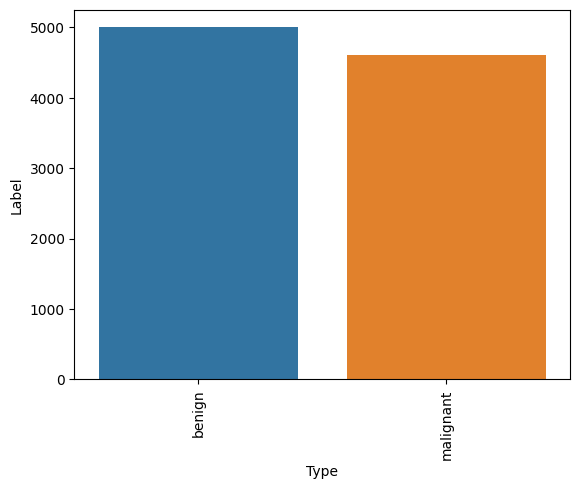

In [ ]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y= counts)
plt.xlabel('Type')
plt.xticks(rotation=90)

In [ ]:
train, test = train_test_split(data, test_size=0.25, random_state= 42 )

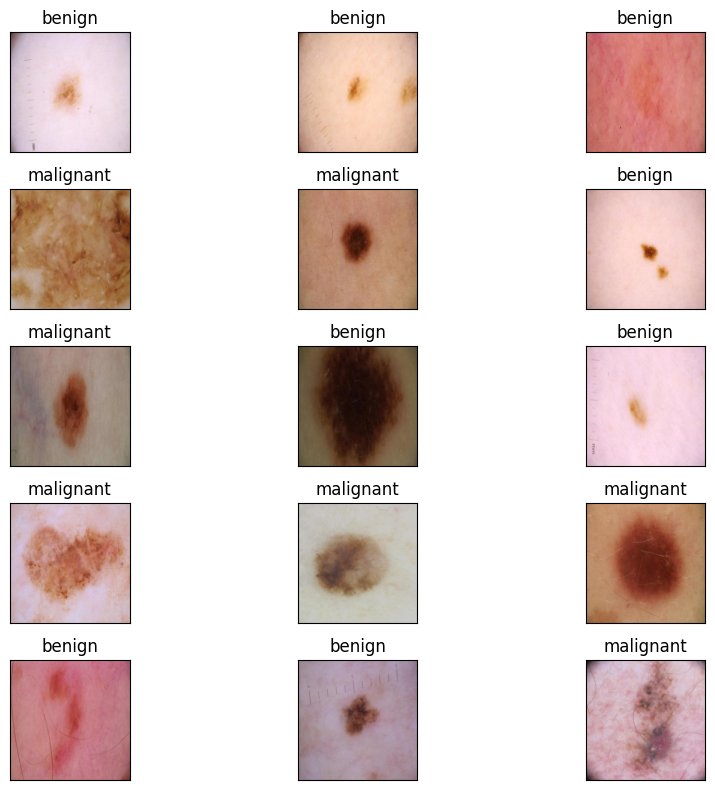

In [ ]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize=(10,8), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [ ]:
### DATA AUGMENTATION
train_datagen = ImageDataGenerator(rotation_range = 4,
                                  width_shift_range = 0.8,
                                  brightness_range = (0.2,0.9),
                                  shear_range = 0.1,
                                  zoom_range = 0.50,
                                  channel_shift_range = 0.90,
                                  fill_mode = 'nearest',
                                  cval = 0.87,
                                  horizontal_flip = True,
                                  vertical_flip = True)

test_datagen = ImageDataGenerator(rotation_range = 4,
                                  width_shift_range = 0.8,
                                  brightness_range = (0.2, 0.9),
                                  shear_range = 0.1,
                                  zoom_range = 0.50,
                                  channel_shift_range = 0.90,
                                  fill_mode = 'nearest',
                                  cval = 0.87,
                                  horizontal_flip = True,
                                  vertical_flip = True)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe = train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100, 100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)

valid_gen = train_datagen.flow_from_dataframe(
    dataframe = test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100, 100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)

test_gen = train_datagen.flow_from_dataframe(
    dataframe = test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100, 100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)

Found 7203 validated image filenames belonging to 2 classes.
Found 2402 validated image filenames belonging to 2 classes.
Found 2402 validated image filenames belonging to 2 classes.


In [ ]:
pretrained_model = ResNet50(
    input_shape=(100,100,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
    
)

pretrained_model.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
my_callbacks = [EarlyStopping(monitor='val_accuracy',
                             min_delta=0,
                              patience=2,
                              mode='auto')]

In [ ]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=35
)

Epoch 1/35
226/226 [==============================] - 66s 235ms/step - loss: 0.4082 - accuracy: 0.8116 - val_loss: 0.3421 - val_accuracy: 0.8476
Epoch 2/35
226/226 [==============================] - 50s 222ms/step - loss: 0.3484 - accuracy: 0.8473 - val_loss: 0.3380 - val_accuracy: 0.8564
Epoch 3/35
226/226 [==============================] - 49s 215ms/step - loss: 0.3425 - accuracy: 0.8498 - val_loss: 0.3326 - val_accuracy: 0.8568
Epoch 4/35
226/226 [==============================] - 50s 220ms/step - loss: 0.3286 - accuracy: 0.8566 - val_loss: 0.3223 - val_accuracy: 0.8659
Epoch 5/35
226/226 [==============================] - 49s 217ms/step - loss: 0.3208 - accuracy: 0.8605 - val_loss: 0.3343 - val_accuracy: 0.8543
Epoch 6/35
226/226 [==============================] - 50s 219ms/step - loss: 0.3097 - accuracy: 0.8603 - val_loss: 0.3502 - val_accuracy: 0.8439
Epoch 7/35
226/226 [==============================] - 58s 256ms/step - loss: 0.3107 - accuracy: 0.8667 - val_loss: 0.3127 - val_ac

In [ ]:
model.save("model_resnet50.h5")

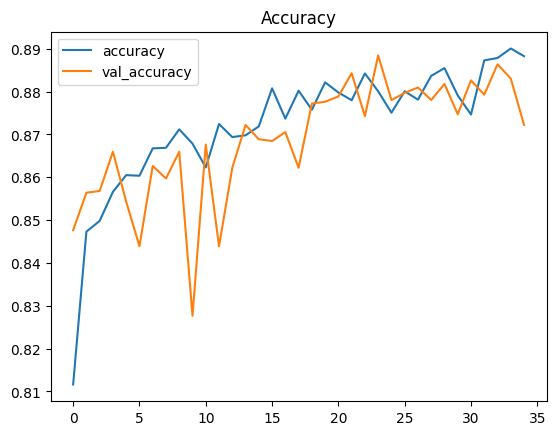

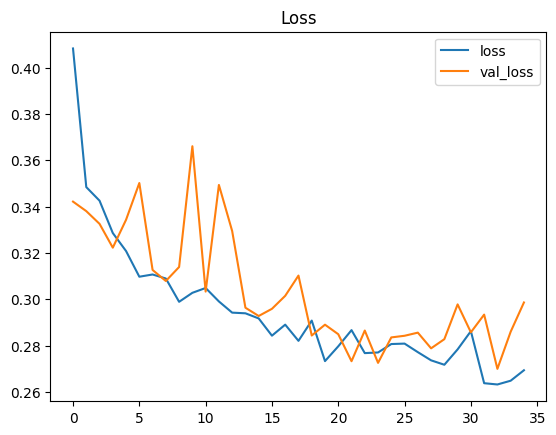

In [ ]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
results = model.evaluate(test_gen, verbose=0)

print("   Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

   Test Loss: 0.29055
Test Accuracy: 87.80%


In [ ]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred, axis=1)

# Map the Label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

76/76 [==============================] - 14s 167ms/step


In [ ]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      benign       0.85      0.94      0.89      1213
   malignant       0.93      0.83      0.88      1189

    accuracy                           0.88      2402
   macro avg       0.89      0.88      0.88      2402
weighted avg       0.89      0.88      0.88      2402



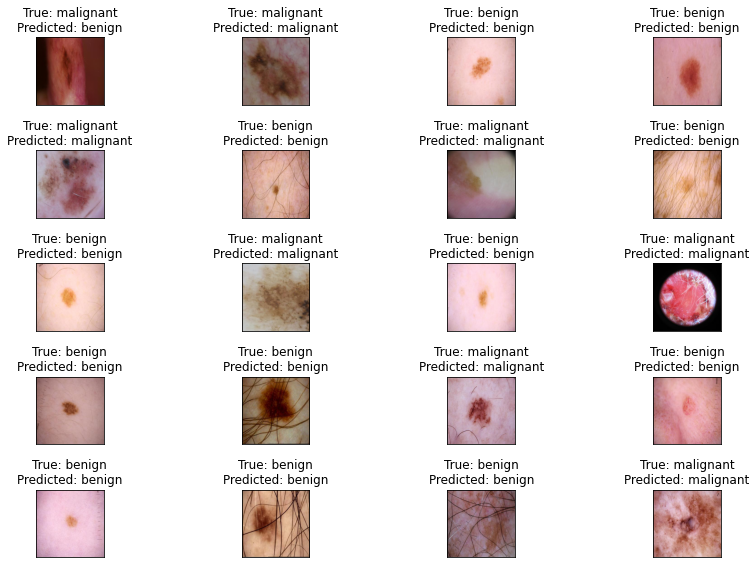

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
# import cv2
# import numpy as np
# from matplotlib.pyplot import imread
# from matplotlib.pyplot import imshow
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.imagenet_utils import decode_predictions
# from tensorflow.keras.applications.imagenet_utils import preprocess_input

# img_path = 'melanoma-img'

# img = cv2.imread(img_path)
# img = cv2.resize(img, (100, 100))

# x = np.expand_dims(img, axis=0)
# x = preprocess_input(x)
# result = model.predict(x)
# print((result*100).astype('int'))

# my_image = imread(img_path)
# imshow(my_image)


In [ ]:
from tensorflow.keras.models import load_model
loaded_model_imagenet = load_model("model_resnet50.h5")
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import cv2

1/1 [==============================] - 0s 26ms/step
[[99  0]]


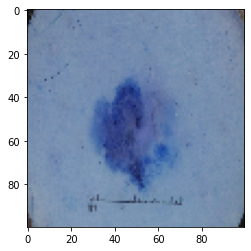

In [ ]:
img_path = '/content/ISIC_0333091.jpg'

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = loaded_model_imagenet.predict(x)
print((result*100).astype('int'))

plt.imshow(img)

In [ ]:
p = list((result*100).astype('int'))
pp = list(p[0])
print(pp)

[99, 0]


In [ ]:
print("Largest Element is:", max(pp))

Largest Element is: 99


In [ ]:
index = pp.index(max(pp))

In [ ]:
name_class = ['benign', 'melignant']

In [ ]:
name_class[index]

'benign'

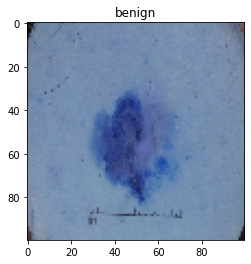

In [ ]:
plt.title(name_class[index])
plt.imshow(img)

# **Augmentation Melanoma_VGG16_Model**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
pretrained_model=VGG16(
    input_shape=(100,100,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable=False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
inputs=pretrained_model.input
x=Dense(128,activation='relu')(pretrained_model.output)
x=Dense(128,activation='relu')(x)

outputs=Dense(2,activation='sigmoid')(x)

model=Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
### Function for early stopping of training epochs if no change in validation accuracy
my_callbacks=[EarlyStopping(monitor='val_accuracy',
                           min_delta=0,
                           patience=2,
                           mode='auto')]

In [ ]:
history=model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=35
)

Epoch 1/35
226/226 [==============================] - 58s 237ms/step - loss: 0.4552 - accuracy: 0.8115 - val_loss: 0.3904 - val_accuracy: 0.8347
Epoch 2/35
226/226 [==============================] - 51s 225ms/step - loss: 0.3761 - accuracy: 0.8401 - val_loss: 0.3649 - val_accuracy: 0.8514
Epoch 3/35
226/226 [==============================] - 50s 221ms/step - loss: 0.3646 - accuracy: 0.8481 - val_loss: 0.3547 - val_accuracy: 0.8493
Epoch 4/35
226/226 [==============================] - 58s 257ms/step - loss: 0.3455 - accuracy: 0.8521 - val_loss: 0.3426 - val_accuracy: 0.8468
Epoch 5/35
226/226 [==============================] - 50s 221ms/step - loss: 0.3308 - accuracy: 0.8584 - val_loss: 0.3318 - val_accuracy: 0.8526
Epoch 6/35
226/226 [==============================] - 50s 221ms/step - loss: 0.3331 - accuracy: 0.8612 - val_loss: 0.3516 - val_accuracy: 0.8464
Epoch 7/35
226/226 [==============================] - 50s 222ms/step - loss: 0.3285 - accuracy: 0.8601 - val_loss: 0.3349 - val_ac

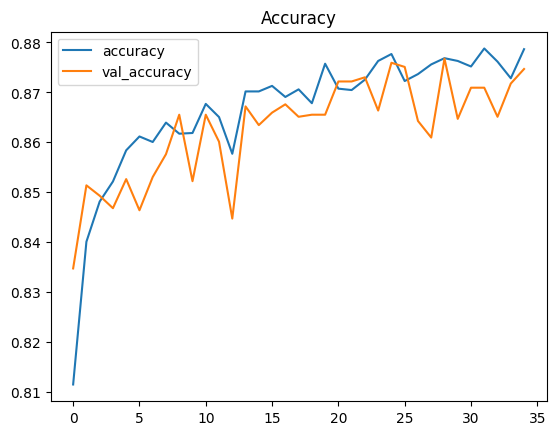

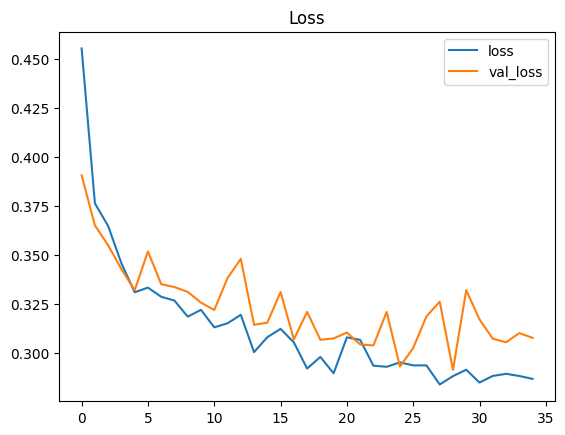

In [ ]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
### Changes after Augmentation
results=model.evaluate(test_gen,verbose=0)
print(" Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1]*100))

 Test Loss: 0.29573
Test Accuracy: 87.39%


In [ ]:
#Predict
pred=model.predict(test_gen)
pred=np.argmax(pred,axis=1)

#Map
labels=(train_gen.class_indices)
labels=dict((v,k) for k,v in labels.items())
pred=[labels[k] for k in pred]

76/76 [==============================] - 12s 160ms/step


In [ ]:
# VG-16
y_test=list(test.Label)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      benign       0.83      0.92      0.87      1213
   malignant       0.91      0.80      0.85      1189

    accuracy                           0.86      2402
   macro avg       0.87      0.86      0.86      2402
weighted avg       0.87      0.86      0.86      2402



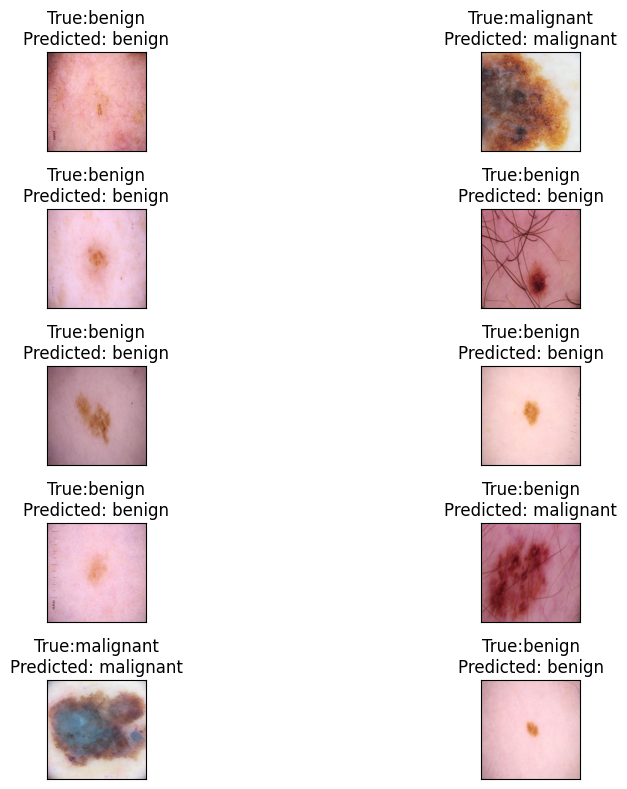

In [ ]:
fig,axes=plt.subplots(nrows=5, ncols=2, figsize=(12,8),
                     subplot_kw={'xticks': [], 'yticks': []})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True:{test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

# **Melanoma_InceptionV3_Model**

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
pretrained_model=InceptionV3(
    input_shape=(100,100,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable=False

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
inputs=pretrained_model.input
x=Dense(128,activation='relu')(pretrained_model.output)
x=Dense(128,activation='relu')(x)

outputs=Dense(2,activation='sigmoid')(x)

model=Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
### Function for early stopping of training epochs if no change in validation accuracy
my_callbacks=[EarlyStopping(monitor='val_accuracy',
                           min_delta=0,
                           patience=2,
                           mode='auto')]

In [ ]:
history=model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=35
)

Epoch 1/35
226/226 [==============================] - 57s 221ms/step - loss: 1.3176 - accuracy: 0.7035 - val_loss: 0.5399 - val_accuracy: 0.7581
Epoch 2/35
226/226 [==============================] - 46s 206ms/step - loss: 0.5736 - accuracy: 0.7332 - val_loss: 0.5320 - val_accuracy: 0.7381
Epoch 3/35
226/226 [==============================] - 47s 208ms/step - loss: 0.5416 - accuracy: 0.7419 - val_loss: 0.5007 - val_accuracy: 0.7602
Epoch 4/35
226/226 [==============================] - 48s 211ms/step - loss: 0.5917 - accuracy: 0.7187 - val_loss: 0.5198 - val_accuracy: 0.7398
Epoch 5/35
226/226 [==============================] - 48s 211ms/step - loss: 0.5379 - accuracy: 0.7343 - val_loss: 0.5276 - val_accuracy: 0.7598
Epoch 6/35
226/226 [==============================] - 48s 212ms/step - loss: 0.5275 - accuracy: 0.7366 - val_loss: 0.4915 - val_accuracy: 0.7764
Epoch 7/35
226/226 [==============================] - 49s 216ms/step - loss: 0.5172 - accuracy: 0.7483 - val_loss: 0.4863 - val_ac

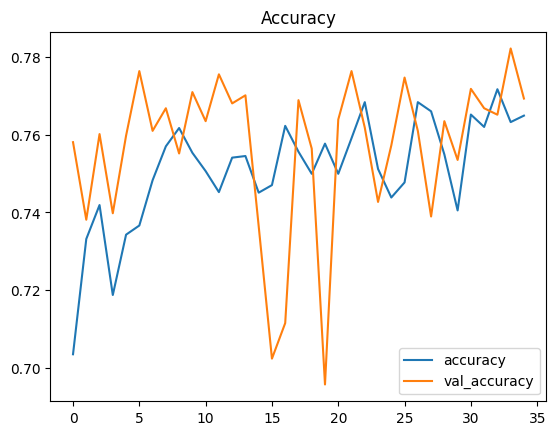

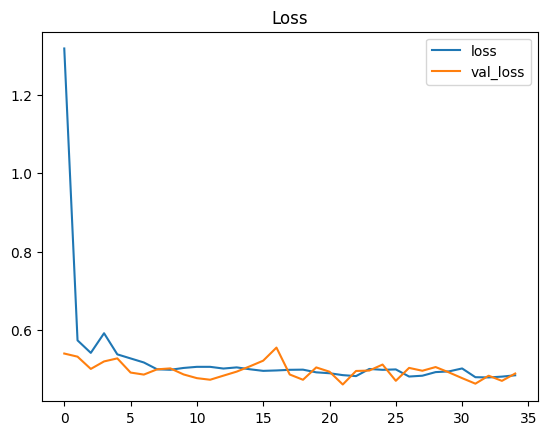

In [ ]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
results=model.evaluate(test_gen,verbose=0)
print(" Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1]*100))

 Test Loss: 0.49206
Test Accuracy: 77.44%


In [ ]:
#Predict
pred=model.predict(test_gen)
pred=np.argmax(pred,axis=1)

#Map
labels=(train_gen.class_indices)
labels=dict((v,k) for k,v in labels.items())
pred=[labels[k] for k in pred]

76/76 [==============================] - 13s 160ms/step


In [ ]:
# Inception_V3
y_test=list(test.Label)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      benign       0.80      0.76      0.78      1213
   malignant       0.76      0.81      0.79      1189

    accuracy                           0.78      2402
   macro avg       0.78      0.78      0.78      2402
weighted avg       0.78      0.78      0.78      2402



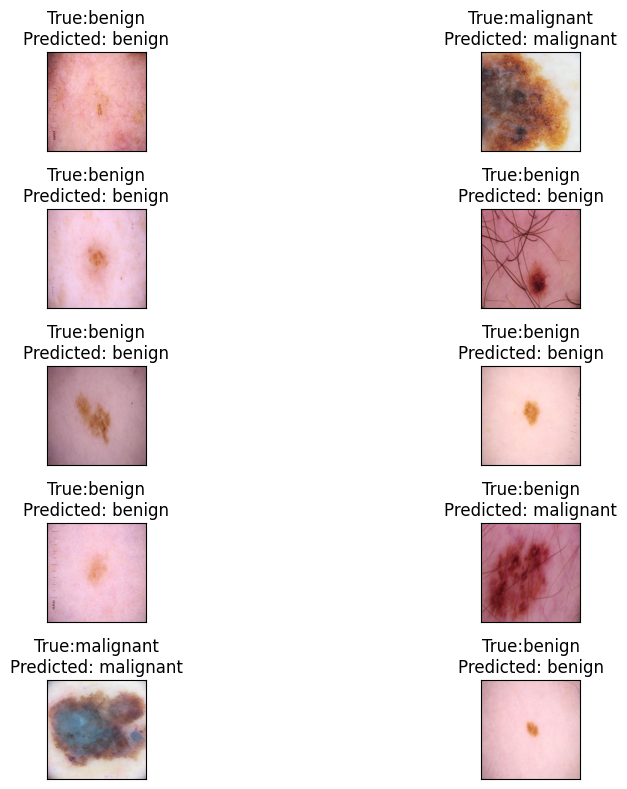

In [ ]:
fig,axes=plt.subplots(nrows=5, ncols=2, figsize=(12,8),
                     subplot_kw={'xticks': [], 'yticks': []})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True:{test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

# **Melanoma_MobileNet_Model**

In [ ]:
import tensorflow.compat.v2 as tf

In [ ]:
pretrained_model = tf.keras.applications.MobileNet(
    input_shape=(100,100,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable=False

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
inputs=pretrained_model.input
x=Dense(128,activation='relu')(pretrained_model.output)
x=Dense(128,activation='relu')(x)

outputs=Dense(2,activation='sigmoid')(x)

model=Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
### Function for early stopping of training epochs if no change in validation accuracy
my_callbacks=[EarlyStopping(monitor='val_accuracy',
                           min_delta=0,
                           patience=2,
                           mode='auto')]

In [ ]:
history=model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=35
)

Epoch 1/35
226/226 [==============================] - 52s 210ms/step - loss: 0.4785 - accuracy: 0.7758 - val_loss: 0.4796 - val_accuracy: 0.7648
Epoch 2/35
226/226 [==============================] - 57s 253ms/step - loss: 0.4531 - accuracy: 0.7944 - val_loss: 0.4390 - val_accuracy: 0.8035
Epoch 3/35
226/226 [==============================] - 47s 208ms/step - loss: 0.4365 - accuracy: 0.7980 - val_loss: 0.4637 - val_accuracy: 0.7914
Epoch 4/35
226/226 [==============================] - 47s 206ms/step - loss: 0.4378 - accuracy: 0.7965 - val_loss: 0.4317 - val_accuracy: 0.8006
Epoch 5/35
226/226 [==============================] - 45s 199ms/step - loss: 0.4325 - accuracy: 0.8031 - val_loss: 0.4290 - val_accuracy: 0.8002
Epoch 6/35
226/226 [==============================] - 45s 200ms/step - loss: 0.4296 - accuracy: 0.7994 - val_loss: 0.4324 - val_accuracy: 0.8010
Epoch 7/35
226/226 [==============================] - 45s 200ms/step - loss: 0.4282 - accuracy: 0.8040 - val_loss: 0.4390 - val_ac

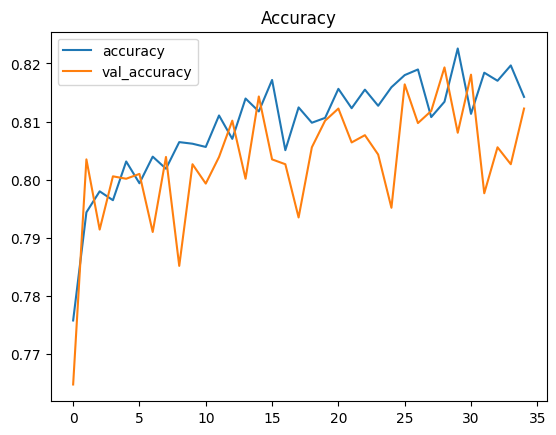

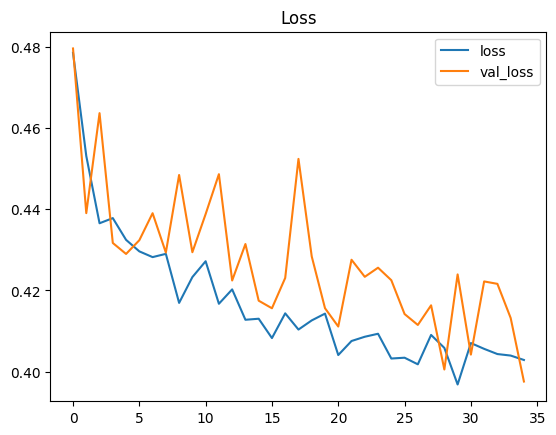

In [ ]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
results=model.evaluate(test_gen,verbose=0)
print(" Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1]*100))

 Test Loss: 0.39953
Test Accuracy: 81.31%


In [ ]:
#Predict
pred=model.predict(test_gen)
pred=np.argmax(pred,axis=1)

#Map
labels=(train_gen.class_indices)
labels=dict((v,k) for k,v in labels.items())
pred=[labels[k] for k in pred]

76/76 [==============================] - 12s 152ms/step


In [ ]:
# MobileNet
y_test=list(test.Label)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      benign       0.79      0.84      0.81      1213
   malignant       0.82      0.77      0.79      1189

    accuracy                           0.80      2402
   macro avg       0.80      0.80      0.80      2402
weighted avg       0.80      0.80      0.80      2402



# **Melanoma_MobileNetV2_Model**

In [ ]:
import tensorflow.compat.v2 as tf

In [ ]:
  apretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(100,100,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable=False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
inputs=pretrained_model.input
x=Dense(128,activation='relu')(pretrained_model.output)
x=Dense(128,activation='relu')(x)

outputs=Dense(2,activation='sigmoid')(x)

model=Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
### Function for early stopping of training epochs if no change in validation accuracy
my_callbacks=[EarlyStopping(monitor='val_accuracy',
                           min_delta=0,
                           patience=2,
                           mode='auto')]

In [ ]:
history=model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=25
)

Epoch 1/25
226/226 [==============================] - 28s 100ms/step - loss: 0.3647 - accuracy: 0.8415 - val_loss: 0.3259 - val_accuracy: 0.8597
Epoch 2/25
226/226 [==============================] - 20s 87ms/step - loss: 0.3003 - accuracy: 0.8752 - val_loss: 0.3036 - val_accuracy: 0.8714
Epoch 3/25
226/226 [==============================] - 21s 93ms/step - loss: 0.2700 - accuracy: 0.8844 - val_loss: 0.3227 - val_accuracy: 0.8626
Epoch 4/25
226/226 [==============================] - 20s 90ms/step - loss: 0.2501 - accuracy: 0.8916 - val_loss: 0.3780 - val_accuracy: 0.8381
Epoch 5/25
226/226 [==============================] - 21s 93ms/step - loss: 0.2208 - accuracy: 0.9059 - val_loss: 0.2897 - val_accuracy: 0.8784
Epoch 6/25
226/226 [==============================] - 21s 93ms/step - loss: 0.2087 - accuracy: 0.9123 - val_loss: 0.3335 - val_accuracy: 0.8759
Epoch 7/25
226/226 [==============================] - 21s 92ms/step - loss: 0.1953 - accuracy: 0.9180 - val_loss: 0.3221 - val_accuracy

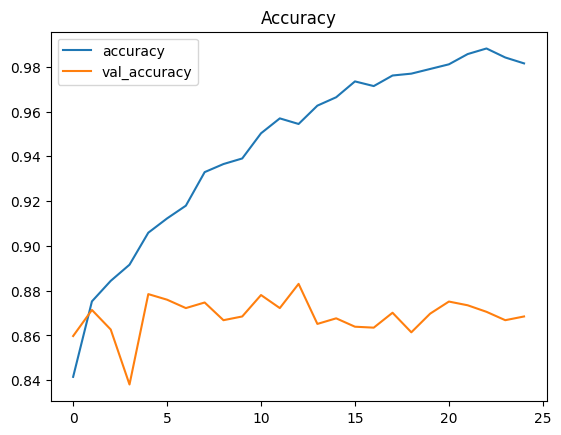

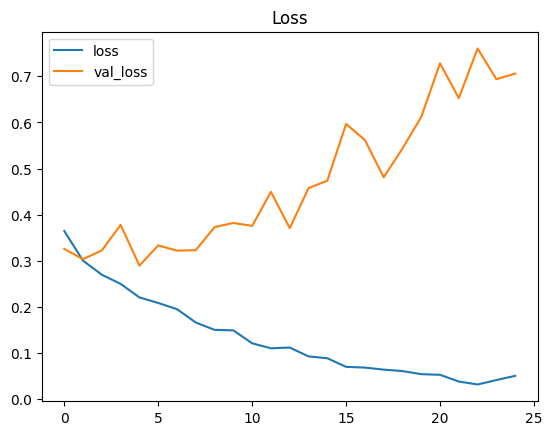

In [ ]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
results=model.evaluate(test_gen,verbose=0)
print(" Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1]*100))

 Test Loss: 0.70583
Test Accuracy: 86.84%


In [ ]:
#Predict
pred=model.predict(test_gen)
pred=np.argmax(pred,axis=1)

#Map
labels=(train_gen.class_indices)
labels=dict((v,k) for k,v in labels.items())
pred=[labels[k] for k in pred]

76/76 [==============================] - 5s 63ms/step


In [ ]:
# MobileNetV2
y_test=list(test.Label)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      benign       0.88      0.87      0.88      1279
   malignant       0.86      0.86      0.86      1123

    accuracy                           0.87      2402
   macro avg       0.87      0.87      0.87      2402
weighted avg       0.87      0.87      0.87      2402



# **ResNet50 Augmentation Model**

In [ ]:
filepath=pd.Series(filepaths,name='Filepath').astype(str)
labels=pd.Series(labels,name='Label')
data=pd.concat([filepath,labels],axis=1)
data=data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,/content/melanoma_cancer_dataset/train/benign/...,NaN
1,/content/melanoma_cancer_dataset/train/benign/...,NaN
2,/content/melanoma_cancer_dataset/train/benign/...,NaN
3,/content/melanoma_cancer_dataset/train/benign/...,NaN
4,/content/melanoma_cancer_dataset/train/benign/...,NaN


In [ ]:
train,test=train_test_split(data,test_size=0.25,random_state=42)

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
test_datagen  = ImageDataGenerator(preprocessing_function = preprocess_input)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe = train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100, 100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)

valid_gen = train_datagen.flow_from_dataframe(
    dataframe = test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100, 100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)

test_gen = train_datagen.flow_from_dataframe(
    dataframe = test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100, 100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)

TypeError: ignored

In [ ]:
### DATA AUGMENTATION
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [ ]:
train_gen= train_datagen.flow_from_dataframe( dataframe=train, x_col='Filepath', y_col='Label', batch_size = 20, class_mode = 'categorical', target_size = (224, 224))

valid_gen=test_datagen.flow_from_dataframe( dataframe=test, x_col='Filepath', y_col='Label', batch_size = 20, class_mode = 'categorical', target_size = (224, 224))

test_gen=test_datagen.flow_from_dataframe( 
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=20,
    shuffle=False
    
)

TypeError: ignored